In [30]:
%run Function_set.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt


In [31]:
network,pos = Make_Question(3,3,Density = 0.85, option = "1-norm", distance = 2)

print(network)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0.]]


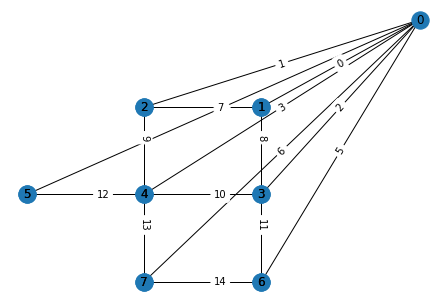

In [32]:
G, compelete_label, graph = complete_Graph(network,pos)

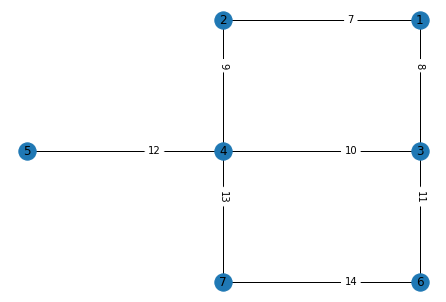

In [33]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

In [34]:
%run Function_set.ipynb
Final_map, lowest_edge_number = edge_map(G, compelete_label, sub_edge_label)

7


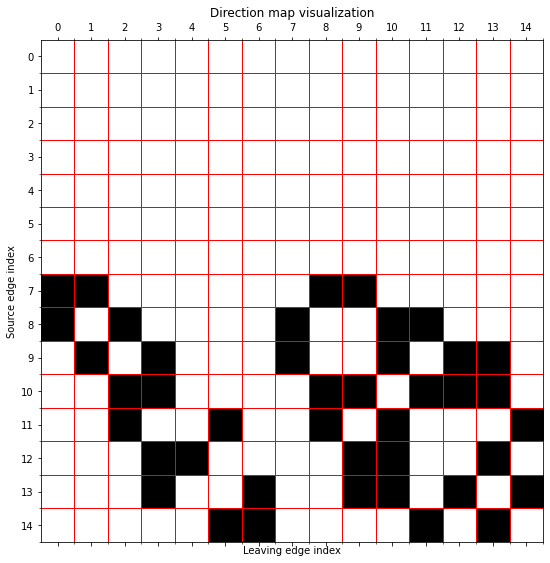

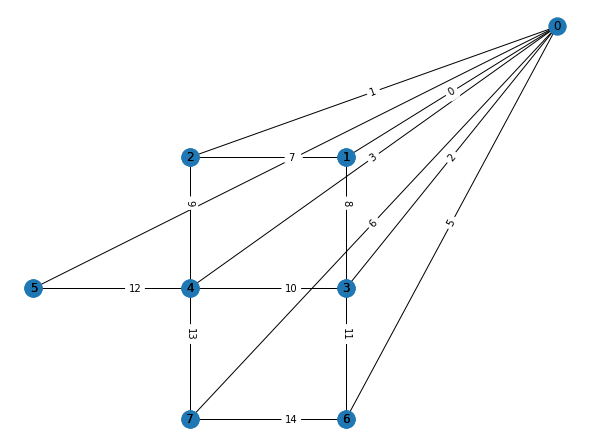

In [35]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(Final_map,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, Final_map.shape[0], step=1))
ax.set_yticks(np.arange(0, Final_map.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, Final_map.shape[0], step=1))
ax.set_yticklabels(np.arange(0, Final_map.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, Final_map.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, Final_map.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [36]:
# How many panel ---> Max electricity level wire could reach 
Q = len(pos)-1

# How many edges
edge_number = len(compelete_label)

# make dictionary
edge_dictionary,Total = make_dictionary(edge_number, Q)

# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
basic_cost = np.ones(edge_number)

# flow cost (p)
flow_cost = np.ones(edge_number)

# initialize a QUBO matrix needed
QUBO_matrix_initial = np.zeros((edge_number*Q,edge_number*Q))


penal = 50

In [37]:
# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
%run Function_set.ipynb

QUBO_Obj = Objective(Q, edge_number, edge_dictionary, QUBO_matrix_initial, basic_cost,flow_cost)

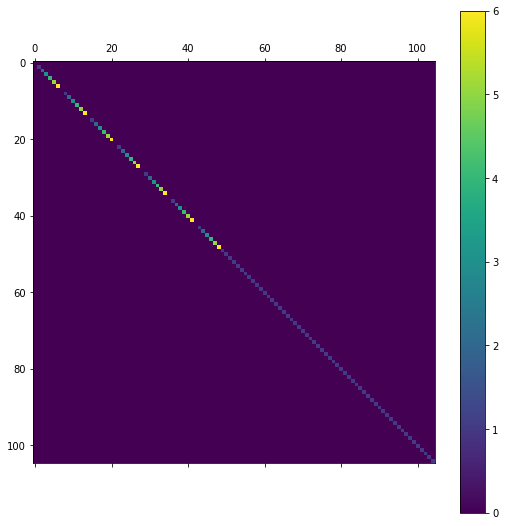

In [38]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Obj,fignum=matfig.number)
plt.colorbar()
plt.show()

In [39]:
%run Function_set.ipynb
QUBO_Constraint_1 = Constraint_1(Final_map, Q, edge_number, edge_dictionary, QUBO_matrix_initial, penalty = penal)

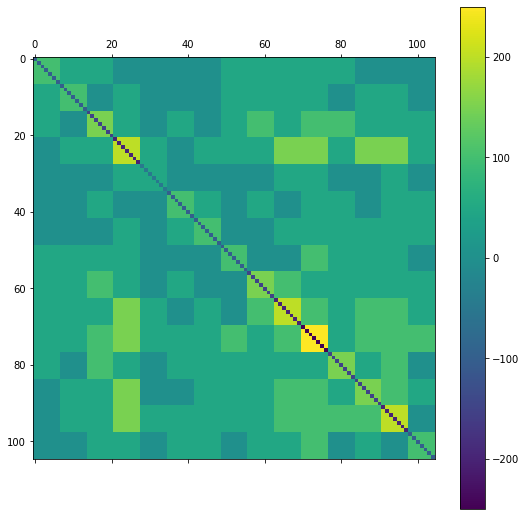

In [40]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_1,fignum=matfig.number)
plt.colorbar()
plt.show()

In [41]:
%run Function_set.ipynb
QUBO_Constraint_2 = Constraint_2(Final_map, Q, edge_number, edge_dictionary, QUBO_matrix_initial, penalty = penal)

[]
[]
[]
[]
[]
[]
[]
[0 1 8 9]
[8 9]
[ 0  2  7 10 11]
[ 7 10 11]
[ 1  3  7 10 12 13]
[ 7 10 12 13]
[ 2  3  8  9 11 12 13]
[ 8  9 11 12 13]
[ 2  5  8 10 14]
[ 8 10 14]
[ 3  4  9 10 13]
[ 9 10 13]
[ 3  6  9 10 12 14]
[ 9 10 12 14]
[ 5  6 11 13]
[11 13]


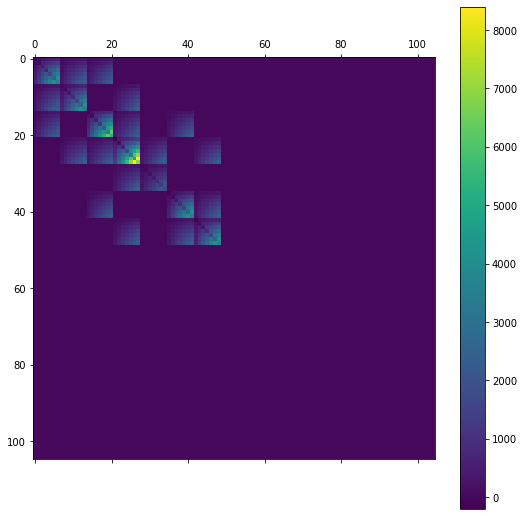

In [42]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [43]:
QUBO_matrix = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2

print(np.shape(QUBO_matrix ))

(105, 105)


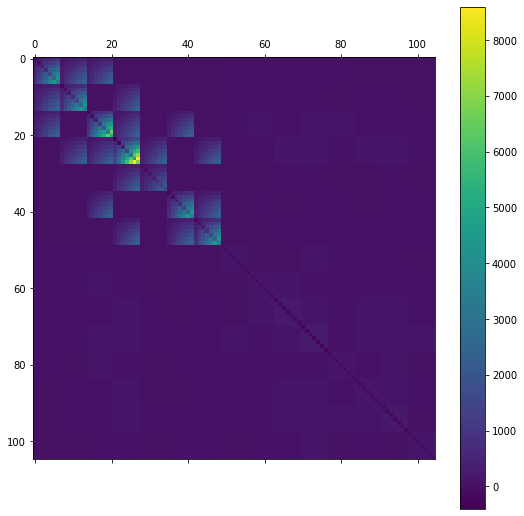

In [44]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [45]:
%run Function_set_dic.ipynb
m_t_u,m_t_l = capacity_subtree_limit_generator(pos,Q)

print(m_t_u)
m_t_l[:]=1
print(m_t_l)




[4. 6. 2. 6. 6. 7. 3.]
[1. 1. 1. 1. 1. 1. 1.]


In [46]:

QUBO_matrix, QUBO_C3_p1, edge_dictionary_C31 = Constraint_3_part_1(Final_map, m_t_u, Q, edge_number, edge_dictionary, QUBO_matrix, penalty = penal)


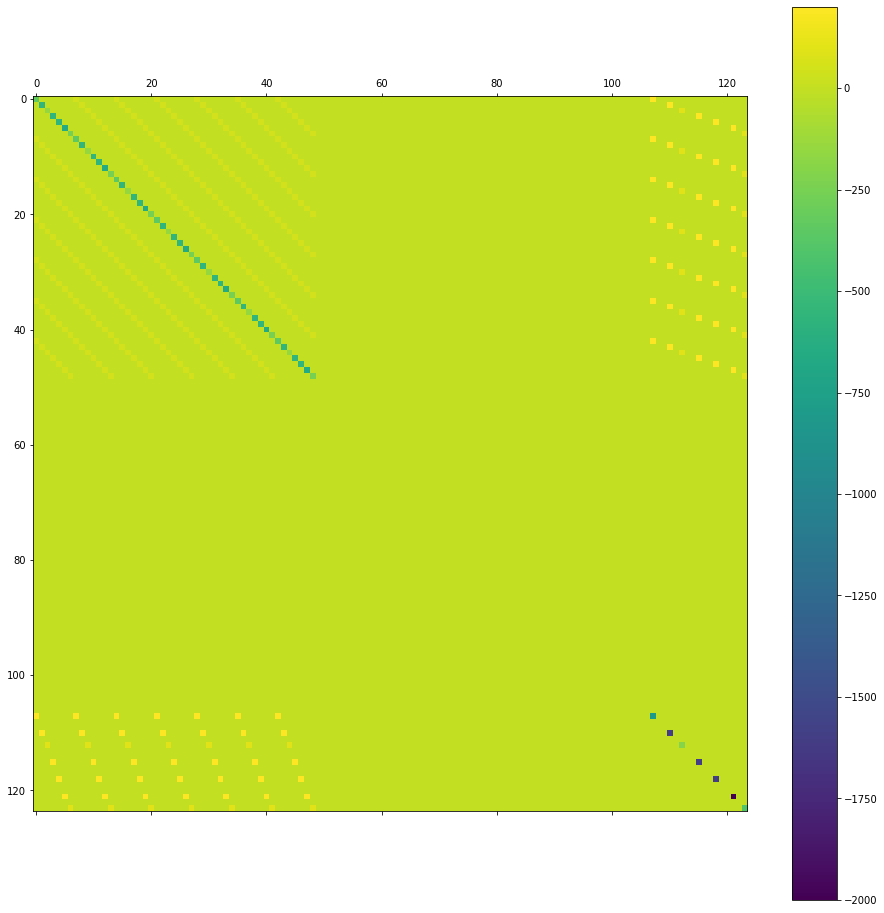

In [47]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_C3_p1 ,fignum=matfig.number)
plt.colorbar()
plt.show()

In [48]:
QUBO_matrix, QUBO_C3_p2, edge_dictionary_C32 = Constraint_3_part_2(Final_map, m_t_l, Q, edge_number, edge_dictionary_C31, QUBO_matrix, penalty = penal)

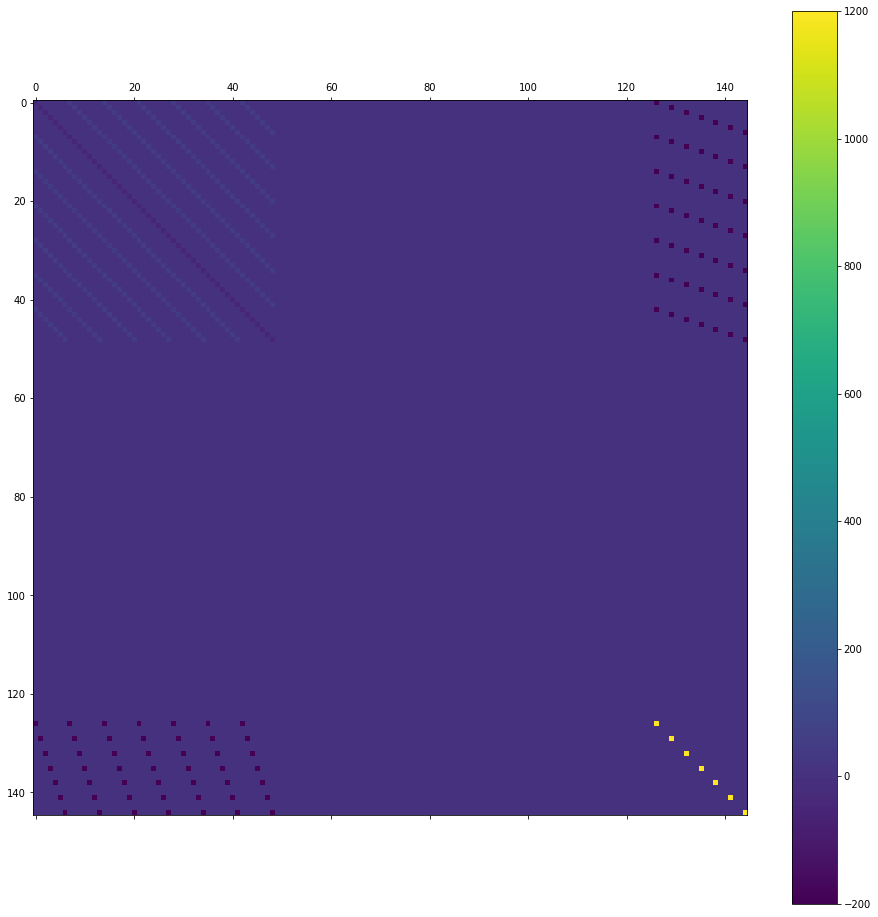

In [49]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_C3_p2 ,fignum=matfig.number)
plt.colorbar()
plt.show()

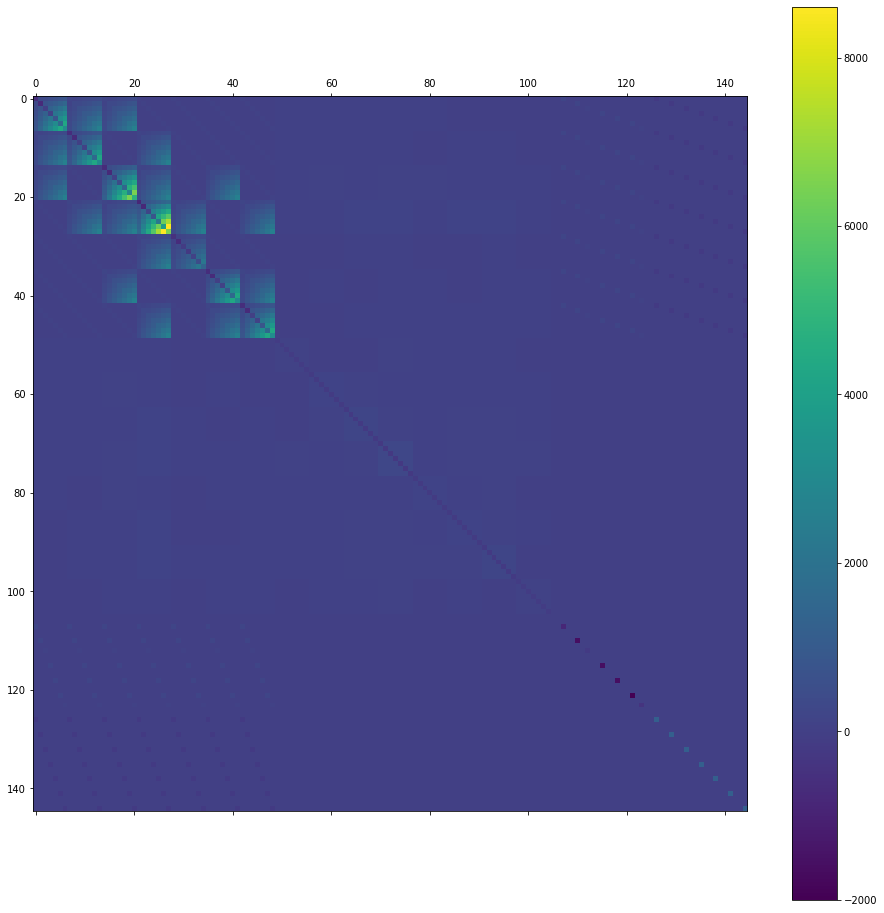

In [50]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [51]:
# Bus edge Ban map( Q ** 2)  可以通过就是 1 不可以就是 0
Ban_map_Bus = np.ones( Q**2 )



Final_QUBO_matrix, QUBO_Constraint_4 = Constraint_4(QUBO_matrix, Q, Ban_map_Bus ,penalty = 1e6)


print(np.shape(Final_QUBO_matrix))

(145, 145)


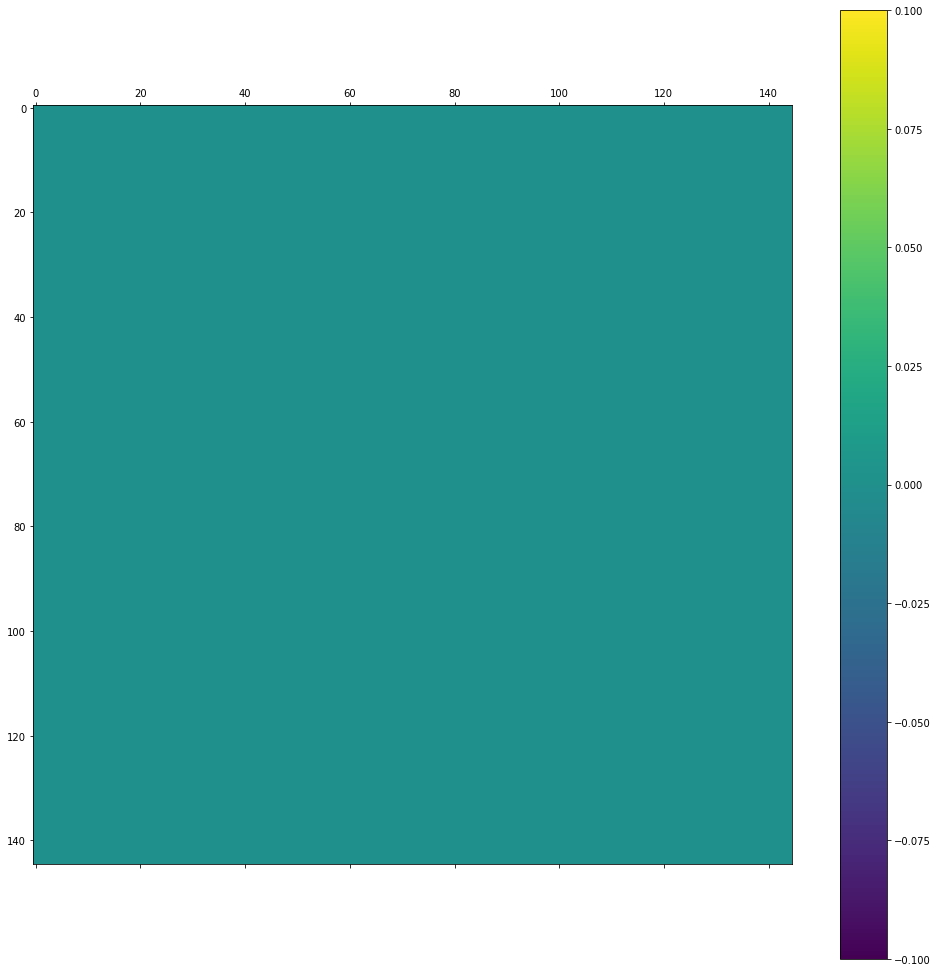

In [52]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(QUBO_Constraint_4,fignum=matfig.number)
plt.colorbar()
plt.show()

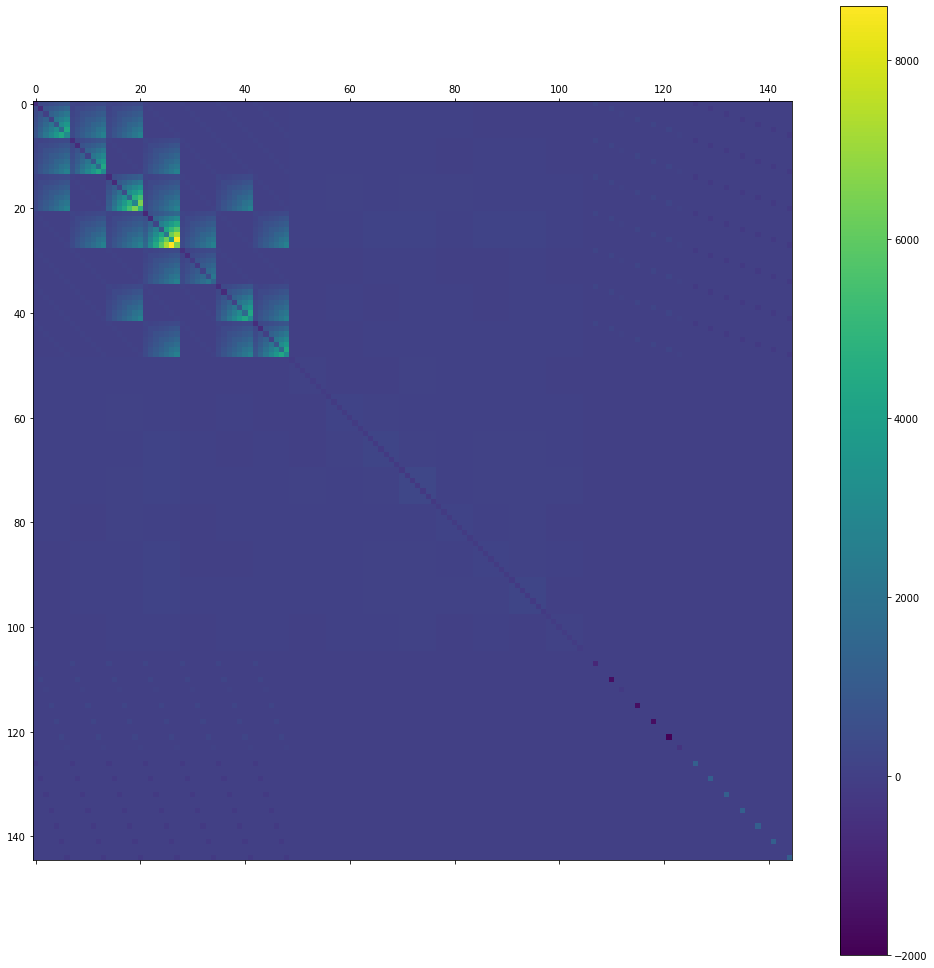

In [53]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(Final_QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()


In [54]:
from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np
import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from matplotlib import pyplot as plt

In [55]:
QUBO = Final_QUBO_matrix

{'qpu_access_time': 83427, 'charge_time': 2998541, 'run_time': 2998541, 'problem_id': '03e57928-0aed-4562-9c28-f76e329f994f'}
[  7  14  28  42 105 106 108 110 112 114 115 116 118 119 120 121 123 124
 125 126 127 128 131 137 139 140 143]
[  7  14  28  42 105]
1
2
4
6
15


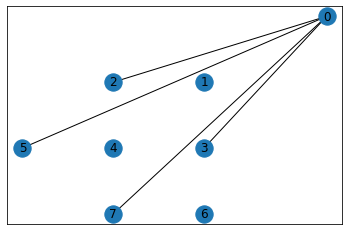

In [56]:
width,height = np.shape(QUBO)

QUBO_dictionary = defaultdict(int)
for i in range(width):
    for j in range(height):
        QUBO_dictionary[(i,j)] = QUBO[i,j]
        

# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO)


OP = sampleset.to_pandas_dataframe()
import pandas as pd

OP = OP.sort_values("energy")
OP_final = OP.to_numpy()

rank = 0

OP_opt = OP_final[rank,:].flatten()
sample = OP_opt.astype(int)

print(sampleset.info)



##
location = np.where(OP_opt[:-2])[0]
print(location)
Q = len(pos)-1  
number_of_edge = len(compelete_label)

final_index = location[location <= Q*number_of_edge ]
print(final_index)


final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network))
for value in final_index:
    print(str(value//Q))
    final_G .add_edges_from([edge for edge, label in compelete_label.items() if label == str(value//Q)])
    
    
nx.draw_networkx(final_G, pos)

In [57]:
[edge for edge, label in compelete_label.items() if label == str(0)]

[(0, 1)]